Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'LINK'
against_currency = 'USD'

start = dt.datetime(2017,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,0.189448,0.152489,0.156494,0.189165,2.718640e+06,0.189165
2017-09-20,0.207892,0.155292,0.189132,0.169680,2.126270e+06,0.169680
2017-09-21,0.181675,0.139869,0.169826,0.150503,1.423220e+06,0.150503
2017-09-22,0.157440,0.126297,0.149562,0.131129,1.186670e+06,0.131129
2017-09-23,0.190250,0.130275,0.131110,0.170278,1.025740e+06,0.170278
...,...,...,...,...,...,...
2021-06-12,23.850052,20.460571,21.697639,23.337601,1.327698e+09,23.337601
2021-06-13,25.208834,22.933525,23.317707,23.860899,1.329108e+09,23.860899
2021-06-14,26.435877,24.464281,25.468372,26.084227,1.606250e+09,26.084227


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1363 entries, 2017-09-19 to 2021-06-18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1363 non-null   float64
 1   Low        1363 non-null   float64
 2   Open       1363 non-null   float64
 3   Close      1363 non-null   float64
 4   Volume     1363 non-null   float64
 5   Adj Close  1363 non-null   float64
 6   Spread     1363 non-null   float64
dtypes: float64(7)
memory usage: 85.2 KB


## Plot the closing value of cardano over time

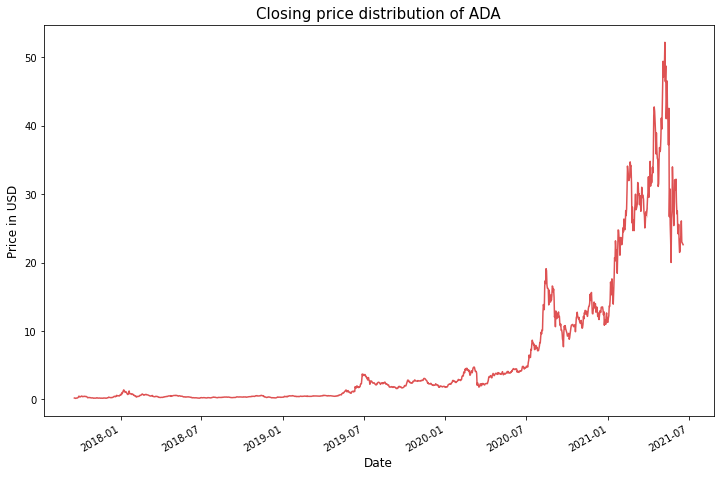

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of ADA", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,0.189448,0.152489,0.156494,0.189165,2.718640e+06,0.189165
2017-09-20,0.207892,0.155292,0.189132,0.169680,2.126270e+06,0.169680
2017-09-21,0.181675,0.139869,0.169826,0.150503,1.423220e+06,0.150503
2017-09-22,0.157440,0.126297,0.149562,0.131129,1.186670e+06,0.131129
2017-09-23,0.190250,0.130275,0.131110,0.170278,1.025740e+06,0.170278
...,...,...,...,...,...,...
2021-06-12,23.850052,20.460571,21.697639,23.337601,1.327698e+09,23.337601
2021-06-13,25.208834,22.933525,23.317707,23.860899,1.329108e+09,23.860899
2021-06-14,26.435877,24.464281,25.468372,26.084227,1.606250e+09,26.084227


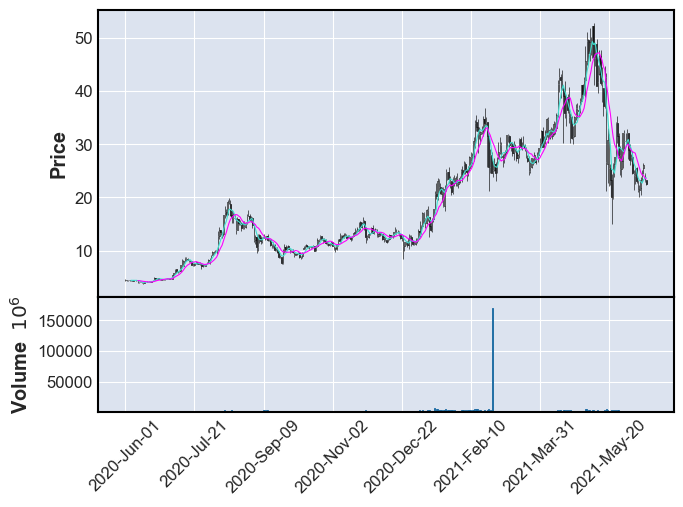

In [6]:
mpf.plot(temp_base_df.loc['2020-6-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
base_df

,High,Low,Open,Close,Volume,Adj Close,Spread
Date,,,,,,,
2017-09-19,0.189448,0.152489,0.156494,0.189165,2.718640e+06,0.189165,0.036959
2017-09-20,0.207892,0.155292,0.189132,0.169680,2.126270e+06,0.169680,0.052600
2017-09-21,0.181675,0.139869,0.169826,0.150503,1.423220e+06,0.150503,0.041806
2017-09-22,0.157440,0.126297,0.149562,0.131129,1.186670e+06,0.131129,0.031143
2017-09-23,0.190250,0.130275,0.131110,0.170278,1.025740e+06,0.170278,0.059975
...,...,...,...,...,...,...,...
2021-06-12,23.850052,20.460571,21.697639,23.337601,1.327698e+09,23.337601,3.389481
2021-06-13,25.208834,22.933525,23.317707,23.860899,1.329108e+09,23.860899,2.275309
2021-06-14,26.435877,24.464281,25.468372,26.084227,1.606250e+09,26.084227,1.971596


In [9]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
986,2020-06-02,4.490729
987,2020-06-03,4.433020
988,2020-06-04,4.377437
989,2020-06-05,4.342623
990,2020-06-06,4.349933
...,...,...
1358,2021-06-12,23.337601
1359,2021-06-13,23.860899
1360,2021-06-14,26.084227
1361,2021-06-15,23.015078


In [10]:
m = Prophet()
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
378,2021-06-21,34.095606,27.839460,40.249166
379,2021-06-22,33.730751,28.071623,39.514562
380,2021-06-23,34.073245,27.997611,39.665364
381,2021-06-24,33.750042,27.249724,39.108695
382,2021-06-25,33.532945,27.997064,39.725963


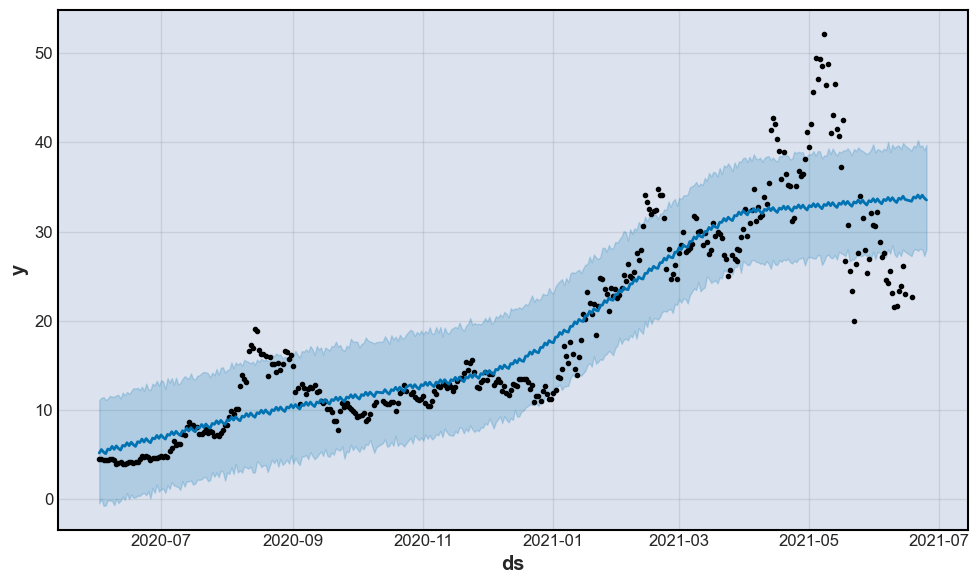

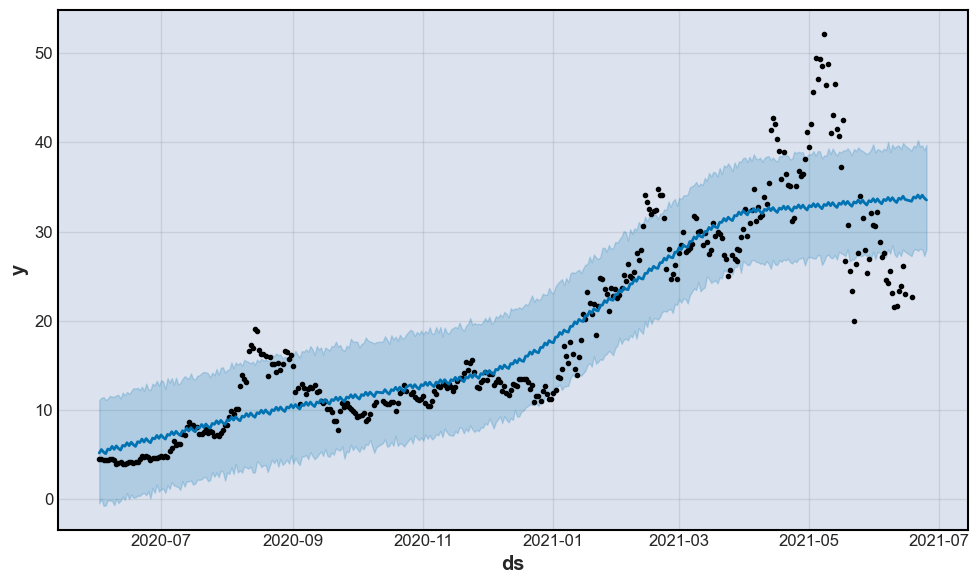

In [11]:
m.plot(forecast)

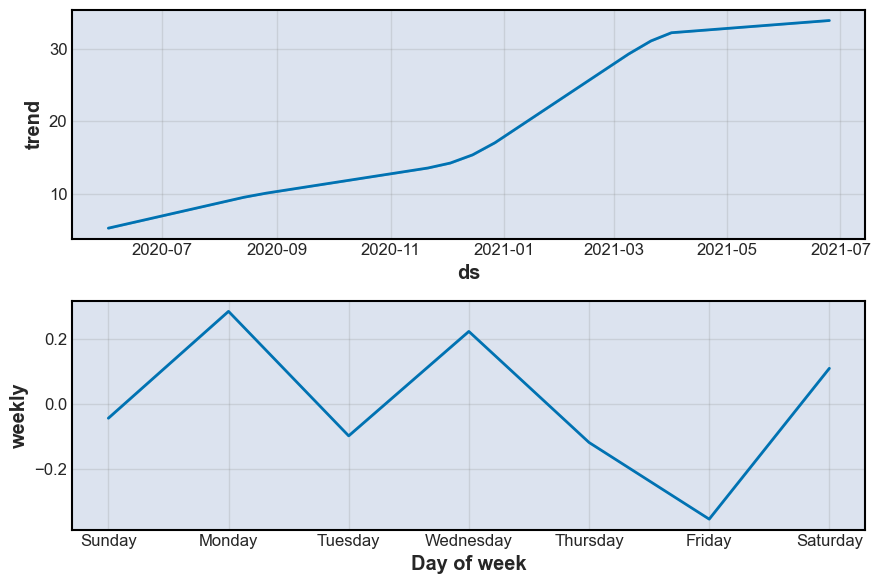

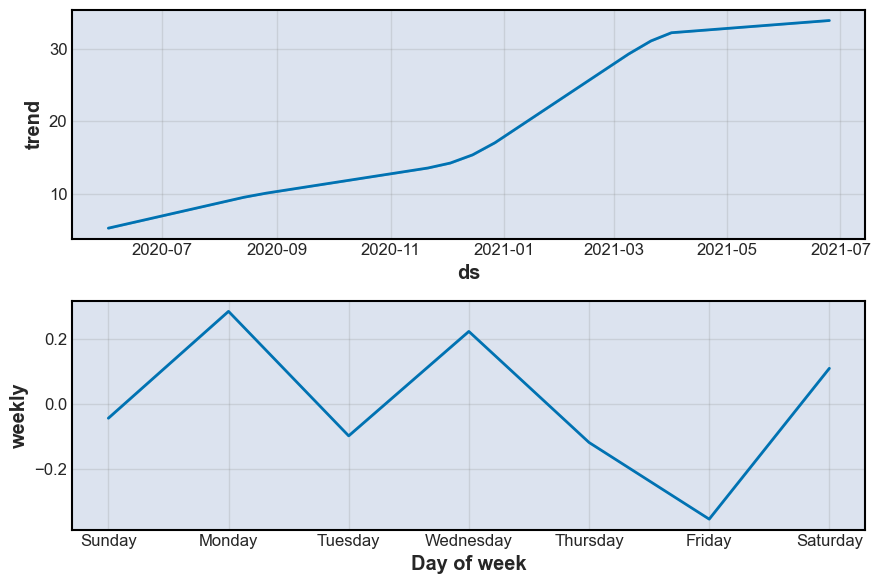

In [12]:
m.plot_components(forecast)